In [245]:
import cv2
import os
import imutils
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr

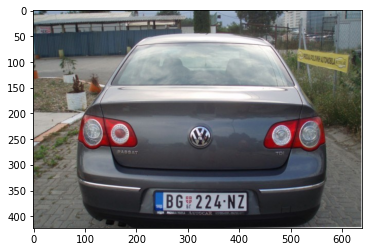

In [246]:
img = cv2.imread('car.jpg',1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

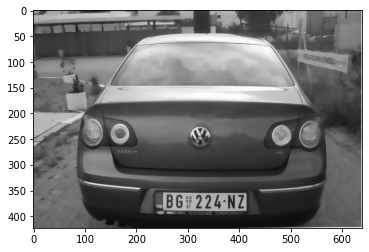

In [247]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
plt.imshow(cv2.cvtColor(bfilter,cv2.COLOR_BGR2RGB))
plt.show()

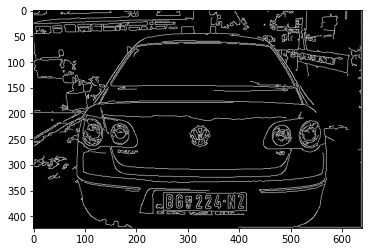

In [248]:
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

In [249]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss,key=cv2.contourArea, reverse = True)[:10]
len(contours)

10

In [250]:
location = None
for i in contours :
    approx = cv2.approxPolyDP(i,10,True)
    if len(approx) == 4 :
        location = approx
        break
print(location)

[[[253 355]]

 [[413 354]]

 [[415 388]]

 [[254 388]]]


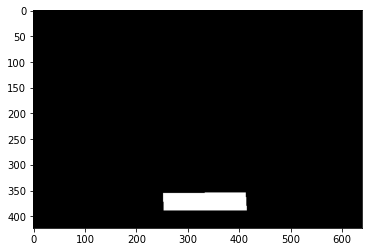

In [251]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1,)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

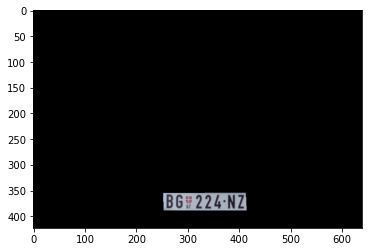

In [252]:
new_image = cv2.bitwise_and(img,img,mask=mask)    
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

In [253]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))

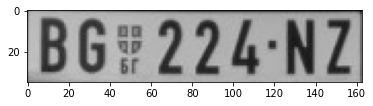

In [254]:
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.show()

In [255]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1, 0], [163, 0], [163, 35], [1, 35]], 'BG # 224 NZ', 0.5493500813159768)]

In [256]:
text = result[0][-2]
text

'BG # 224 NZ'

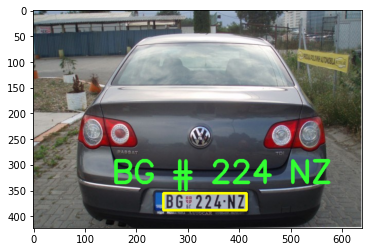

In [257]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text = text,org =(approx[0][0][0]-100,approx[1][0][1]-20),
                  fontFace = font ,fontScale = 2,color = (50,255,50),thickness = 5)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,255),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()